In [73]:
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime
from datetime import timedelta
from sklearn.impute import SimpleImputer
import numpy as np

In [74]:
transportData = "Refrigerated_Truck_Rates_and_Availability_Full.csv"
AvoTransportData = "avocado_tranpsort.csv"
avo_data = "avo_prices.csv"
gas_data = "gas_prices.csv"
loadweather = "NewSDweatherData6.csv"
bananaprices = "banana_prices.csv"

In [75]:
banana_prices_df = pd.read_csv(bananaprices)
banana_prices_df.head()

,Date,Banana Price per Pound,old,Percent Change
0,1/1/2016,0.581,-0.003,-0.3
1,2/1/2016,0.573,-0.030,-3.0
2,3/1/2016,0.586,-0.012,-1.2
3,4/1/2016,0.574,-0.039,-3.9
4,5/1/2016,0.570,-0.021,-2.1


In [76]:
SDweather_df = pd.read_csv(loadweather)
SDweather_df.head()

,dt_iso,dt,timezone,lat,lon,temp,feels_like,temp_min,temp_max,pressure,...,grnd_level,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id
0,2015-01-01,1.420112e+09,-28800.0,32.715738,-117.161084,46.119167,38.966667,42.921667,51.287917,1019.291667,...,NaN,45.958333,5.002083,160.583333,NaN,NaN,NaN,NaN,14.541667,800.708333
1,2015-01-02,1.420198e+09,-28800.0,32.715738,-117.161084,48.741250,42.147917,45.371250,53.362917,1020.291667,...,NaN,54.500000,5.635833,144.583333,NaN,NaN,NaN,NaN,4.166667,800.166667
2,2015-01-03,1.420285e+09,-28800.0,32.715738,-117.161084,50.742917,45.510000,47.449167,54.095000,1021.916667,...,NaN,62.583333,4.790833,204.250000,NaN,NaN,NaN,NaN,21.041667,801.041667
3,2015-01-04,1.420371e+09,-28800.0,32.715738,-117.161084,52.755417,47.413333,50.084583,56.322917,1025.166667,...,NaN,63.708333,5.609167,185.416667,NaN,NaN,NaN,NaN,18.458333,800.875000
4,2015-01-05,1.420457e+09,-28800.0,32.715738,-117.161084,58.379167,53.038333,55.012917,62.826667,1023.375000,...,NaN,59.041667,6.302500,199.208333,NaN,NaN,NaN,NaN,29.708333,775.458333


In [77]:
initial_transport_df = pd.read_csv(transportData)
initial_transport_df.head()

,Date,Week,Month,Quarter,Year,Region,Origin,Destination,Distance,Commodity,Week Low,Week High,Midpoint,Rate Per Mile,Availability
0,01/07/2020,1,1,1,2020,Arizona,"Imperial, Palo Verde And Coachella Valleys, Ca...",ATLANTA,2100.0,"LETTUCE, BROCCOLI, CAULIFLOWER, ROMAINE AND LE...",5000,5400,5200,2.48,5
1,01/07/2020,1,1,1,2020,Arizona,"Imperial, Palo Verde And Coachella Valleys, Ca...",BALTIMORE,2600.0,"LETTUCE, BROCCOLI, CAULIFLOWER, ROMAINE AND LE...",6400,6800,6600,2.54,5
2,01/07/2020,1,1,1,2020,Arizona,"Imperial, Palo Verde And Coachella Valleys, Ca...",BOSTON,2900.0,"LETTUCE, BROCCOLI, CAULIFLOWER, ROMAINE AND LE...",7300,7800,7550,2.60,5
3,01/07/2020,1,1,1,2020,Arizona,"Imperial, Palo Verde And Coachella Valleys, Ca...",CHICAGO,2030.0,"LETTUCE, BROCCOLI, CAULIFLOWER, ROMAINE AND LE...",4700,5200,4950,2.44,5
4,01/07/2020,1,1,1,2020,Arizona,"Imperial, Palo Verde And Coachella Valleys, Ca...",DALLAS,1300.0,"LETTUCE, BROCCOLI, CAULIFLOWER, ROMAINE AND LE...",3600,4100,3850,2.96,5


In [78]:
initial_avo_transport_df = pd.read_csv(AvoTransportData)
# initial_avo_transport_df.head()
initial_avo_transport_df.head()

,Date,Week,Month,Quarter,Year,Region,Origin,Destination,Distance,Commodity,Week Low,Week High,Midpoint,Rate Per Mile,Availability
0,01/07/2020,1,1,1,2020,California,South District California,ATLANTA,2100,"CITRUS, AVOCADOS",4500,5500,5100,2.43,3
1,01/07/2020,1,1,1,2020,California,South District California,BALTIMORE,2600,"CITRUS, AVOCADOS",5800,6800,6300,2.42,3
2,01/07/2020,1,1,1,2020,California,South District California,BOSTON,2900,"CITRUS, AVOCADOS",6600,7500,6900,2.38,3
3,01/07/2020,1,1,1,2020,California,South District California,CHICAGO,2030,"CITRUS, AVOCADOS",4100,5000,4500,2.22,3
4,01/07/2020,1,1,1,2020,California,South District California,DALLAS,1300,"CITRUS, AVOCADOS",3200,4200,3400,2.62,3


In [79]:
avo_data_df = pd.read_csv(avo_data)


merge_avo_df = avo_data_df.loc[avo_data_df['region'] == 'TotalUS']
merge_avo_df = merge_avo_df.loc[merge_avo_df['type'] == 'conventional']
merge_avo_df = merge_avo_df[['New Date', 'AveragePrice']]

In [80]:
gas_data_df = pd.read_csv(gas_data)
gas_data_df.head()

,Date,Gasoline - All Grades,All Grades - Conventional Areas,All Grades - Reformulated Areas,Regular,Conventional Areas - Regular,Reformulated Areas - Regular,Midgrade,Conventional Areas - Midgrade,Reformulated Areas - Midgrade,Premium,Conventional Areas - Premium,Reformulated Areas - Premium,Diesel (On-Highway) - All Types,Ultra Low Sulfur (15 ppm and Under),Low Sulfer (Above 15 ppm to 500 ppm)
0,8/20/1990,NaN,NaN,NaN,1.191,1.191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8/27/1990,NaN,NaN,NaN,1.245,1.245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9/3/1990,NaN,NaN,NaN,1.242,1.242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9/10/1990,NaN,NaN,NaN,1.252,1.252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9/17/1990,NaN,NaN,NaN,1.266,1.266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
merge_avo_df.head()

,New Date,AveragePrice
51,1/5/2015,0.95
159,1/12/2015,1.01
267,1/19/2015,1.03
375,1/26/2015,1.04
483,2/2/2015,0.89


In [82]:
merge_avo_df = merge_avo_df.rename(columns={"New Date": "Date",
                                                        "AveragePrice": "Avo Average Price",
                                                   })

In [83]:
merge_avo_df = merge_avo_df.reset_index()

In [84]:
merge_avo_df = merge_avo_df[['Date', 'Avo Average Price']]
merge_avo_df.head()

,Date,Avo Average Price
0,1/5/2015,0.95
1,1/12/2015,1.01
2,1/19/2015,1.03
3,1/26/2015,1.04
4,2/2/2015,0.89


In [85]:
gas_data_df['Date'].dtype

dtype('O')

In [86]:
gas_data_df['Date'] = pd.to_datetime(gas_data_df['Date'])
merge_avo_df['Date'] = pd.to_datetime(merge_avo_df['Date'])

In [87]:
gas_data_df = gas_data_df[['Date', 'Gasoline - All Grades']]
gas_data_df

,Date,Gasoline - All Grades
0,1990-08-20,NaN
1,1990-08-27,NaN
2,1990-09-03,NaN
3,1990-09-10,NaN
4,1990-09-17,NaN
...,...,...
1556,2020-06-15,2.185
1557,2020-06-22,2.216
1558,2020-06-29,2.260
1559,2020-07-06,2.265


In [88]:
initial_avo_transport_df['Date'] = pd.to_datetime(initial_avo_transport_df['Date'])
initial_avo_transport_df.head()

,Date,Week,Month,Quarter,Year,Region,Origin,Destination,Distance,Commodity,Week Low,Week High,Midpoint,Rate Per Mile,Availability
0,2020-01-07,1,1,1,2020,California,South District California,ATLANTA,2100,"CITRUS, AVOCADOS",4500,5500,5100,2.43,3
1,2020-01-07,1,1,1,2020,California,South District California,BALTIMORE,2600,"CITRUS, AVOCADOS",5800,6800,6300,2.42,3
2,2020-01-07,1,1,1,2020,California,South District California,BOSTON,2900,"CITRUS, AVOCADOS",6600,7500,6900,2.38,3
3,2020-01-07,1,1,1,2020,California,South District California,CHICAGO,2030,"CITRUS, AVOCADOS",4100,5000,4500,2.22,3
4,2020-01-07,1,1,1,2020,California,South District California,DALLAS,1300,"CITRUS, AVOCADOS",3200,4200,3400,2.62,3


In [89]:
initial_avo_transport_df = initial_avo_transport_df[['Date', 'Rate Per Mile']]
initial_avo_transport_df.head()

,Date,Rate Per Mile
0,2020-01-07,2.43
1,2020-01-07,2.42
2,2020-01-07,2.38
3,2020-01-07,2.22
4,2020-01-07,2.62


In [90]:
initial_avo_transport_df = initial_avo_transport_df.groupby(by="Date").mean()

initial_avo_transport_df.head()

,Rate Per Mile
Date,
2003-11-04,1.228
2003-11-12,1.272
2003-11-18,1.300
2003-11-25,1.318
2003-12-02,1.284


In [91]:
initial_avo_transport_df = initial_avo_transport_df.reset_index()
initial_avo_transport_df.head()

,Date,Rate Per Mile
0,2003-11-04,1.228
1,2003-11-12,1.272
2,2003-11-18,1.300
3,2003-11-25,1.318
4,2003-12-02,1.284


In [92]:
initial_avo_transport_df['Date'] = initial_avo_transport_df['Date'] - timedelta(days=1)
initial_avo_transport_df.head()

,Date,Rate Per Mile
0,2003-11-03,1.228
1,2003-11-11,1.272
2,2003-11-17,1.300
3,2003-11-24,1.318
4,2003-12-01,1.284


In [93]:
final_df = pd.merge(initial_avo_transport_df, gas_data_df, how='outer', on=['Date'])
final_df.head()

,Date,Rate Per Mile,Gasoline - All Grades
0,2003-11-03,1.228,1.577
1,2003-11-11,1.272,NaN
2,2003-11-17,1.300,1.540
3,2003-11-24,1.318,1.554
4,2003-12-01,1.284,1.533


In [94]:
final_df = pd.merge(final_df, merge_avo_df, how='outer', on=['Date'])
final_df.tail()

,Date,Rate Per Mile,Gasoline - All Grades,Avo Average Price
1573,2017-02-13,NaN,2.418,0.87
1574,2017-07-03,NaN,2.376,1.21
1575,2019-03-18,NaN,2.625,NaN
1576,2019-03-25,NaN,2.701,NaN
1577,2019-12-23,NaN,2.621,NaN


In [95]:
SDweather_df.head()

,dt_iso,dt,timezone,lat,lon,temp,feels_like,temp_min,temp_max,pressure,...,grnd_level,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id
0,2015-01-01,1.420112e+09,-28800.0,32.715738,-117.161084,46.119167,38.966667,42.921667,51.287917,1019.291667,...,NaN,45.958333,5.002083,160.583333,NaN,NaN,NaN,NaN,14.541667,800.708333
1,2015-01-02,1.420198e+09,-28800.0,32.715738,-117.161084,48.741250,42.147917,45.371250,53.362917,1020.291667,...,NaN,54.500000,5.635833,144.583333,NaN,NaN,NaN,NaN,4.166667,800.166667
2,2015-01-03,1.420285e+09,-28800.0,32.715738,-117.161084,50.742917,45.510000,47.449167,54.095000,1021.916667,...,NaN,62.583333,4.790833,204.250000,NaN,NaN,NaN,NaN,21.041667,801.041667
3,2015-01-04,1.420371e+09,-28800.0,32.715738,-117.161084,52.755417,47.413333,50.084583,56.322917,1025.166667,...,NaN,63.708333,5.609167,185.416667,NaN,NaN,NaN,NaN,18.458333,800.875000
4,2015-01-05,1.420457e+09,-28800.0,32.715738,-117.161084,58.379167,53.038333,55.012917,62.826667,1023.375000,...,NaN,59.041667,6.302500,199.208333,NaN,NaN,NaN,NaN,29.708333,775.458333


In [96]:
weather_df = SDweather_df[['dt_iso', 'temp']]
weather_df = weather_df.rename(columns={"dt_iso": "Date",
                                                        "temp": "Temp (F)",
                                                   })

In [97]:
weather_df

,Date,Temp (F)
0,2015-01-01,46.119167
1,2015-01-02,48.741250
2,2015-01-03,50.742917
3,2015-01-04,52.755417
4,2015-01-05,58.379167
...,...,...
1426,2018-11-27,63.020417
1427,2018-11-28,61.155000
1428,2018-11-29,61.515000
1429,2018-11-30,61.797500


In [99]:
weather_df['Date'] = pd.to_datetime(weather_df['Date'])

In [100]:
final_df = pd.merge(final_df, weather_df, how='inner', on=['Date'])
final_df.head()

,Date,Rate Per Mile,Gasoline - All Grades,Avo Average Price,Temp (F)
0,2015-05-11,2.663333,2.776,1.02,63.347500
1,2015-05-18,2.672222,2.827,1.06,61.847917
2,2015-05-25,2.661111,2.857,1.04,62.741667
3,2015-06-01,2.731111,2.863,1.03,64.777083
4,2015-06-08,2.741111,2.863,1.00,67.384167


In [101]:
final_df.to_csv("final_df.csv", index=False)

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
final_df.head()

,Date,Rate Per Mile,Gasoline - All Grades,Avo Average Price
0,2003-11-01,1.228,NaN,NaN
1,2003-11-09,1.272,NaN,NaN
2,2003-11-15,1.300,NaN,NaN
3,2003-11-22,1.318,NaN,NaN
4,2003-11-29,1.284,NaN,NaN


In [84]:
another_final_df = final_df.copy()
another_final_df

,Date,Rate Per Mile,Gasoline - All Grades,Avo Average Price
0,2003-11-01,1.228,NaN,NaN
1,2003-11-09,1.272,NaN,NaN
2,2003-11-15,1.300,NaN,NaN
3,2003-11-22,1.318,NaN,NaN
4,2003-11-29,1.284,NaN,NaN
...,...,...,...,...
2231,2020-06-15,NaN,2.185,NaN
2232,2020-06-22,NaN,2.216,NaN
2233,2020-06-29,NaN,2.260,NaN
2234,2020-07-06,NaN,2.265,NaN


In [85]:
another_final_df = another_final_df.groupby(by="Date").mean()

another_final_df = another_final_df.reset_index()
another_final_df.head()

,Date,Rate Per Mile,Gasoline - All Grades,Avo Average Price
0,1990-08-20,NaN,NaN,NaN
1,1990-08-27,NaN,NaN,NaN
2,1990-09-03,NaN,NaN,NaN
3,1990-09-10,NaN,NaN,NaN
4,1990-09-17,NaN,NaN,NaN


In [86]:
another_final_df = another_final_df[another_final_df['Date'].dt.year >= 2015]
another_final_df = another_final_df[another_final_df['Date'].dt.year <= 2019]

In [88]:
another_final_df.to_csv('another_jpb_ml.csv', index=False)

In [98]:
another_final_df.fillna(0, inplace=True)

In [104]:
X = another_final_df[["Rate Per Mile", "Gasoline - All Grades"]]
y = another_final_df["Avo Average Price"]
print(X.shape, y.shape)

(450, 2) (450,)


In [105]:
from sklearn.model_selection import train_test_split

another_X_train, another_X_test, another_y_train, another_y_test = train_test_split(X, y, random_state=42)

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(another_X_train)

In [107]:
X_train_scaled = X_scaler.transform(another_X_train)
X_test_scaled = X_scaler.transform(another_X_test)

In [108]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, another_y_train)
    train_score = knn.score(X_train_scaled, another_y_train)
    test_score = knn.score(X_test_scaled, another_y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

ValueError: Unknown label type: 'continuous'

In [27]:
imp=SimpleImputer(missing_values=np.nan, strategy="mean" )
final_df["Gasoline - All Grades"]=imp.fit_transform(final_df[["Gasoline - All Grades"]])

In [28]:
imp=SimpleImputer(missing_values=np.nan, strategy="mean" )
final_df["Avo Average Price"]=imp.fit_transform(final_df[["Avo Average Price"]])

In [29]:
imp=SimpleImputer(missing_values=np.nan, strategy="mean" )
final_df["Rate Per Mile"]=imp.fit_transform(final_df[["Rate Per Mile"]])

In [30]:
final_df = final_df.groupby(by="Date").mean()

final_df = final_df.reset_index()
final_df.head()

,Date,Rate Per Mile,Gasoline - All Grades,Avo Average Price
0,1990-08-20,2.335382,2.208449,1.092012
1,1990-08-27,2.335382,2.208449,1.092012
2,1990-09-03,2.335382,2.208449,1.092012
3,1990-09-10,2.335382,2.208449,1.092012
4,1990-09-17,2.335382,2.208449,1.092012


In [31]:
final_df = final_df[final_df['Date'].dt.year >= 2015]
final_df = final_df[final_df['Date'].dt.year <= 2019]

In [32]:
final_df.to_csv('jpb_ml.csv', index=False)

In [33]:
X = final_df[["Rate Per Mile", "Gasoline - All Grades"]]
y = final_df["Avo Average Price"].values.reshape(-1, 1)
print(X.shape, y.shape)

(450, 2) (450, 1)


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [36]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

In [37]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.02231382191795217
Testing Score: 0.046403958269606305


Text(0.5, 1.0, 'Residual Plot')

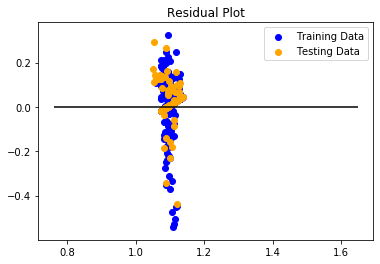

In [38]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

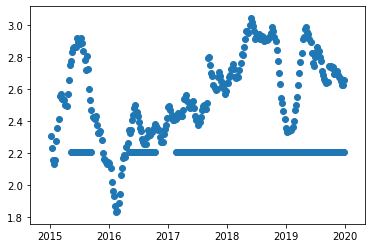

In [39]:
plt.scatter(final_df['Date'], final_df['Gasoline - All Grades'])

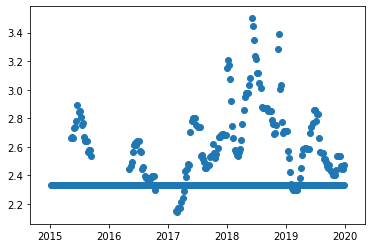

In [40]:
plt.scatter(final_df['Date'], final_df['Rate Per Mile'])

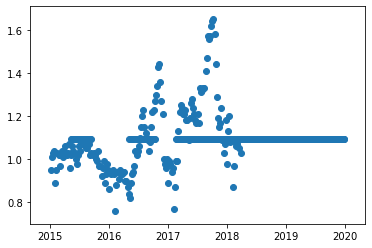

In [41]:
plt.scatter(final_df['Date'], final_df['Avo Average Price'])

In [42]:
final_df['1 Year Shift Avo Average Price'] = final_df['Avo Average Price'].shift(182, axis = 0)

In [43]:
final_df

,Date,Rate Per Mile,Gasoline - All Grades,Avo Average Price,1 Year Shift Avo Average Price
1719,2015-01-05,2.335382,2.308000,0.950000,NaN
1720,2015-01-12,2.335382,2.232000,1.010000,NaN
1721,2015-01-19,2.335382,2.157000,1.030000,NaN
1722,2015-01-26,2.335382,2.133000,1.040000,NaN
1723,2015-02-02,2.335382,2.154000,0.890000,NaN
...,...,...,...,...,...
2164,2019-12-16,2.335382,2.627000,1.092012,1.090000
2165,2019-12-20,2.446667,2.208449,1.092012,1.092012
2166,2019-12-23,2.335382,2.621000,1.092012,1.050000
2167,2019-12-28,2.473333,2.208449,1.092012,1.092012


In [44]:
final_df.to_csv('jpb_ml.csv', index=False)

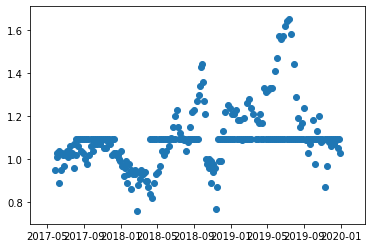

In [45]:
plt.scatter(final_df['Date'], final_df['1 Year Shift Avo Average Price'])

In [46]:
final_df.corr()

,Rate Per Mile,Gasoline - All Grades,Avo Average Price,1 Year Shift Avo Average Price
Rate Per Mile,1.000000e+00,-0.448841,-4.513504e-16,-0.189631
Gasoline - All Grades,-4.488407e-01,1.000000,1.745718e-01,0.250398
Avo Average Price,-4.513504e-16,0.174572,1.000000e+00,-0.092715
1 Year Shift Avo Average Price,-1.896314e-01,0.250398,-9.271466e-02,1.000000


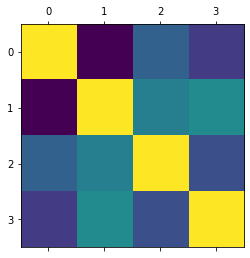

In [47]:
plt.matshow(final_df.corr())
plt.show()

In [48]:
a_final_df = final_df.set_index('Date')

In [49]:
a_final_df.index = pd.to_datetime(a_final_df.index)

In [53]:
import plotly
# plotly.tools.set_credentials_file()

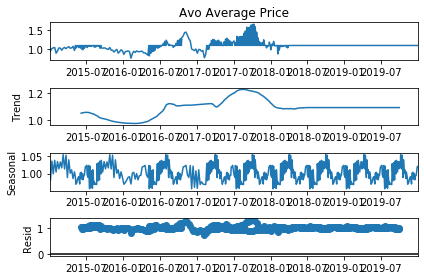

In [122]:
# import chart_studio.plotly as py
# import plotly.graph_objects as go
from  plotly.offline import plot
import cufflinks as cf
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(a_final_df['Avo Average Price'], model='multiplicative', period=52)
fig = result.plot()
# py.iplot(fig)

In [123]:
train = a_final_df['Avo Average Price'].loc['2015-01-05':'2017-12-31']
test = a_final_df['Avo Average Price'].loc['2018-01-01':]

In [51]:
from pmdarima.arima import auto_arima
# from pmdarima.model_selection import train_test_split
stepwise_model = auto_arima(a_final_df['Rate Per Mile'], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=5.32 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=95.986, Time=0.45 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-906.820, Time=1.83 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-360.451, Time=1.37 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-798.870, Time=0.31 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-957.405, Time=5.44 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=17.96 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.97 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=28.622, Time=1.03 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=-960.727, Time=4.33 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=-912.379, Time=1.71 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=13.88 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=6.33 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=-981.153, Time=5.88 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=-93

In [ ]:
stepwise_model.fit(train)

In [ ]:
future_forecast = stepwise_model.predict(n_periods=450)
# This returns an array of predictions:
print(future_forecast)

In [ ]:
future_forecast = pd.DataFrame(future_forecast,index = a_final_df.index,columns=['Prediction'])
pd.concat([a_final_df,future_forecast],axis=1).plot()

In [ ]:
from pmdarima.arima import auto_arima
# from pmdarima.model_selection import train_test_split
stepwise_model = auto_arima(a_final_df['Gasoline - All Grades'], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

In [ ]:
stepwise_model.fit(X_train['Gasoline - All Grades'])

In [ ]:
future_forecast = stepwise_model.predict(n_periods=450)
# This returns an array of predictions:
print(future_forecast)

In [ ]:
future_forecast = pd.DataFrame(future_forecast,index = a_final_df.index,columns=['Prediction2'])
pd.concat([a_final_df,future_forecast],axis=1).plot()

In [109]:
from pmdarima.arima import auto_arima
# from pmdarima.model_selection import train_test_split
stepwise_model = auto_arima(a_final_df['Avo Average Price'], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=8.55 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-560.645, Time=0.17 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-1213.062, Time=1.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.42 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-1075.046, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-1238.778, Time=1.74 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.67 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.56 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-568.170, Time=0.65 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=-1243.892, Time=2.27 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=-1218.640, Time=1.14 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=8.14 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=4.81 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=-1242.989, Time=3.35 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=

In [124]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [126]:
train.shape

(243,)

In [128]:
test.shape

(207,)

In [129]:
future_forecast = stepwise_model.predict(n_periods=207)
# This returns an array of predictions:
print(future_forecast)

[1.21768497 1.08028439 1.2499296  1.06979665 1.14723208 1.06041757
 1.0767942  1.05202996 1.07111123 1.04452901 1.10674368 1.03782098
 1.1370965  1.02758209 1.16573475 1.01842556 1.04029451 1.01023696
 0.95959625 1.00291399 0.95375273 0.99636512 1.004725   0.99050854
 1.03878683 0.9790472  1.08163269 0.96879744 0.96202803 0.95963118
 0.89269043 0.95143389 0.8999185  0.94410313 0.9606868  0.93754731
 0.99578889 0.92494181 1.03190817 0.91366883 0.91532848 0.90358753
 0.84237144 0.89457192 0.8423538  0.88650935 0.89415923 0.87929908
 0.92856177 0.86691264 0.96634704 0.85583558 0.84712352 0.84592948
 0.77437552 0.83707055 0.77640997 0.8291481  0.8320875  0.82206314
 0.86712292 0.80939895 0.90583697 0.79807349 0.78792744 0.78794525
 0.71621971 0.77888767 0.7189496  0.77078757 0.77454068 0.76354373
 0.80956102 0.75079454 0.84748349 0.73939306 0.72954317 0.72919684
 0.65728032 0.72007847 0.65921896 0.711924   0.71406896 0.70463154
 0.74906166 0.69189538 0.78736967 0.68050556 0.66922656 0.6703

In [131]:
predictions = future_forecast.head(52)

In [134]:
test_new = test.head(52)
test_new

Date
2018-01-01    0.980000
2018-01-06    1.092012
2018-01-08    1.130000
2018-01-13    1.092012
2018-01-15    1.200000
2018-01-20    1.092012
2018-01-22    1.080000
2018-01-27    1.092012
2018-01-29    1.090000
2018-02-03    1.092012
2018-02-05    0.870000
2018-02-10    1.092012
2018-02-12    0.970000
2018-02-17    1.092012
2018-02-19    1.080000
2018-02-24    1.092012
2018-02-26    1.060000
2018-03-03    1.092012
2018-03-05    1.070000
2018-03-10    1.092012
2018-03-12    1.090000
2018-03-17    1.092012
2018-03-19    1.050000
2018-03-24    1.092012
2018-03-26    1.030000
2018-03-31    1.092012
2018-04-02    1.092012
2018-04-07    1.092012
2018-04-09    1.092012
2018-04-14    1.092012
2018-04-16    1.092012
2018-04-21    1.092012
2018-04-23    1.092012
2018-04-28    1.092012
2018-04-30    1.092012
2018-05-05    1.092012
2018-05-07    1.092012
2018-05-12    1.092012
2018-05-14    1.092012
2018-05-19    1.092012
2018-05-21    1.092012
2018-05-26    1.092012
2018-05-28    1.092012
2018-0

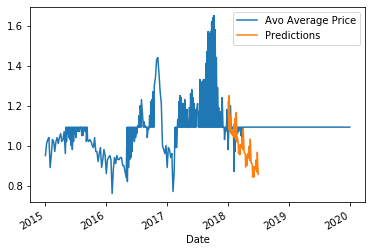

In [133]:
future_forecast = pd.DataFrame(predictions,index = test_new.index,columns=['Predictions'])
pd.concat([a_final_df['Avo Average Price'],future_forecast],axis=1).plot()

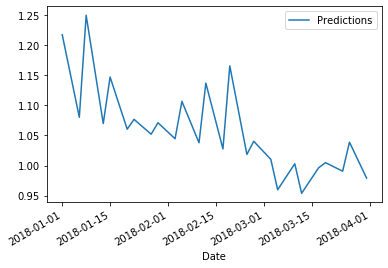

In [140]:
future_forecast['2018-01-01':'2018-04-01'].plot()

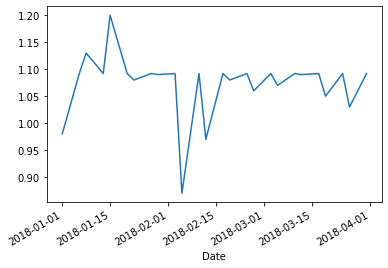

In [139]:
a_final_df['Avo Average Price']['2018-01-01':'2018-04-01'].plot()